In [5]:
import pandas as pd

In [3]:
!wget https://github.com/Azure/AzurePublicDataset/raw/master/data/AzureFunctionsInvocationTraceForTwoWeeksJan2021.rar -O data/azure.rar
!unrar x data/azure.rar data/

--2023-09-26 22:25:22--  https://github.com/Azure/AzurePublicDataset/raw/master/data/AzureFunctionsInvocationTraceForTwoWeeksJan2021.rar
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Azure/AzurePublicDataset/master/data/AzureFunctionsInvocationTraceForTwoWeeksJan2021.rar [following]
--2023-09-26 22:25:22--  https://raw.githubusercontent.com/Azure/AzurePublicDataset/master/data/AzureFunctionsInvocationTraceForTwoWeeksJan2021.rar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18444269 (18M) [application/octet-stream]
Saving to: ‘data/azure.rar’

data/azure.rar      100%[===================>]  1

In [7]:
with open("data/AzureFunctionsInvocationTraceForTwoWeeksJan2021.txt", "r") as fp:
    data = [x.split(",") for x in fp.read().splitlines()]

res = [{"func": x[1], "timestamp": x[2]} for x in data]
df = pd.DataFrame(res)

In [12]:
# round robin map each function to 0-N
func_map = {}
total_models = 5

for i, func in enumerate(df["func"].unique()):
    func_map[func] = i % total_models

res = [{"func": x[1], "timestamp": x[2], "mapped_model": func_map[x[1]]} for x in data]
df = pd.DataFrame(res)
# sort by timestamp
df = df.sort_values(by=["timestamp"])
df.to_csv("data/azure.csv", index=False)

<Axes: xlabel='mapped_model'>

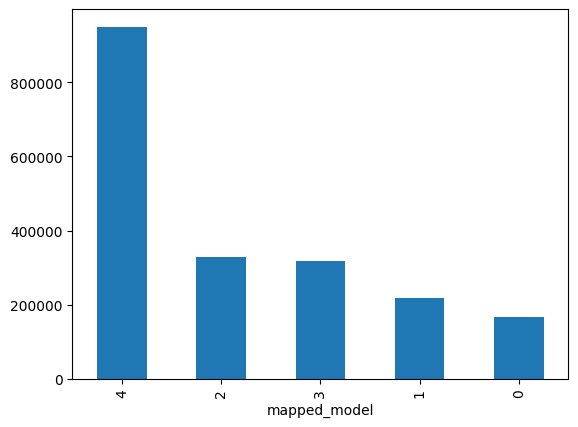

In [14]:
# plot a histogram of the number of invocations per function
df["mapped_model"].value_counts().plot(kind="bar")